In [ ]:
import numpy as np
import cv2
import os
import fnmatch
import json
import math
!pip install mediapipe
import mediapipe as mp
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 33.0 MB 3.9 MB/s 
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully uninstalled flatbuffers-1.12
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.9.2 requires flatbuffers<2,>=1.12, but you have flatbuffers 22.11.23 which is incompatible.
Mounted at /content/drive


In [ ]:
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True, refine_landmarks=True)

In [ ]:
def extract_mesh_from_video(path):
  # open a video file for video capturing
  cap = cv2.VideoCapture(path)
  out = []
  
  # to see if video capturing has been initialized
  while(cap.isOpened()):
    # return (1) if any frames grabbed (2) grabbed image (empty if ret is false)
    ret, frame = cap.read()
    # Q: why frame could be none?
    if frame is not None:
      # process an RGB image and returns the face landmarks on each detected face
      results = face_mesh.process(frame)
      # check if any faces detected
      if not results.multi_face_landmarks:
        continue
      landmarks = results.multi_face_landmarks[0].landmark
      # store landmarks as an array of arrays
      lm = [[a.x, a.y, a.z] for a in landmarks]
      # 3D tensor that stores landmarks frame by frame
      out.append(lm)
    else:
      break

  if len(out) > 0:
    out = np.reshape(np.array(out), (len(out), -1, 3)).tolist()
  return out

In [ ]:
def calculate_mesh_points_variance(path):
    deviations = []
    meshfeatures = extract_mesh_from_video(path)
    i = 0;
    while(i < len(meshfeatures[0])):
        point_x_across_frames = []
        for frame in meshfeatures:
            point_x_across_frames.append(frame[i])

        x_point = 0;
        y_point = 0;
        z_point = 0;
        for point in point_x_across_frames:
            x_point += point[0]
            y_point += point[1]
            z_point += point[2]
        x_mean = x_point / len(point_x_across_frames)
        y_mean = y_point / len(point_x_across_frames)
        z_mean = z_point / len(point_x_across_frames)

        sum_x_diffs = 0;
        sum_y_diffs = 0;
        sum_z_diffs = 0;

        for point in point_x_across_frames:
            sum_x_diffs += (point[0] - x_mean) * (point[0] - x_mean)
            sum_y_diffs += (point[1] - y_mean) * (point[1] - y_mean)
            sum_z_diffs += (point[2] - z_mean) * (point[2] - z_mean)

        standard_deviation_x = math.sqrt(sum_x_diffs / len(point_x_across_frames))
        standard_deviation_y = math.sqrt(sum_y_diffs / len(point_x_across_frames))
        standard_deviation_z = math.sqrt(sum_z_diffs / len(point_x_across_frames))

        deviations.append([standard_deviation_x, standard_deviation_y, standard_deviation_z])
        i += 1
    print(len(deviations))
    return deviations

In [ ]:
def calculate_overall_mesh_variance(path):
    deviation_arr = calculate_mesh_points_variance(path)
    x_mean = 0;
    y_mean = 0;
    z_mean = 0;

    for arr in deviation_arr:
        x_mean += arr[0]
        y_mean += arr[1]
        z_mean += arr[2]
    
    x_mean = x_mean / len(deviation_arr)
    y_mean = y_mean / len(deviation_arr)
    z_mean = z_mean / len(deviation_arr)
    return [x_mean, y_mean, z_mean]

In [ ]:
# get the path of the webm file
path = '/content/drive/Shareddrives/URSI 2022/Eye Tracking ML/prolific_eye_data_experiment/153_sample_webm/'
all_files = os.listdir(path)

In [ ]:
ten8qa9r = []
for filename in all_files:
    if "6zkff4vo" in filename:
        ten8qa9r.append(filename)

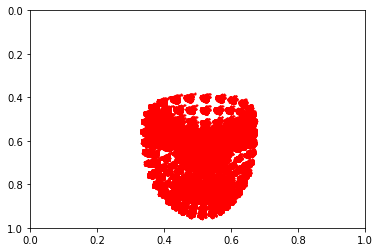

In [ ]:
ax = plt.axes(xlim=(0,1),ylim=(1,0))

x = []
y = []

for filename in ten8qa9r:
    face_mesh_arr = ((extract_mesh_from_video(path + filename)))

    for face_mesh_points in face_mesh_arr:
        for point in face_mesh_points:
            x.append(point[0])
            y.append(point[1])
ax.scatter(x, y, c='red', s=1)

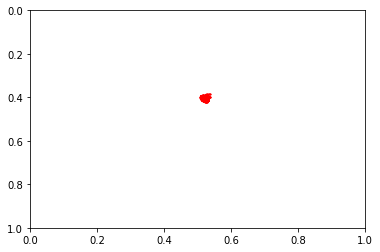

In [ ]:
ax = plt.axes(xlim=(0,1),ylim=(1,0))
x = []
y = []

for filename in ten8qa9r:
    face_mesh_arr = ((extract_mesh_from_video(path + filename)))
    for face_mesh_points in face_mesh_arr:  
        x.append(face_mesh_points[10][0])
        y.append(face_mesh_points[10][1])
ax.scatter(x, y, c='red', s=1)

In [ ]:
for filename in all_files:
    print(filename, calculate_overall_mesh_variance(path + filename))

478
n7flh0hx_0_test_17_95.webm [0.0010201521156665257, 0.0012930187774314787, 0.0009766377425385042]
478
92kt8cg1_0_test_33_65.webm [0.0006334056327377901, 0.0014861700397129087, 0.0006675599698771468]
478
zmdqq11j_1_calibration_90_50.webm [0.0029865469729867546, 0.001610335000987291, 0.001302054852254904]
478
c6p28g6e_1_test_28_25.webm [0.000558438806422069, 0.0009673973572931826, 0.0007145310010955576]
478
92kt8cg1_0_test_51_88.webm [0.0006383531273493297, 0.001112400531663626, 0.0007548240124142006]
478
zmdqq11j_1_test_36_14.webm [0.006254055873370798, 0.005652833877344291, 0.0018038479592937552]
478
c6p28g6e_1_test_36_61.webm [0.000654246290755229, 0.0009977934899717546, 0.0007894728618510091]
478
n7flh0hx_0_test_95_65.webm [0.0011926167809959579, 0.001298943946236346, 0.0009404830949321972]
478
92kt8cg1_0_test_25_72.webm [0.0007305303841044302, 0.0006638226985539235, 0.0005300516103917044]
478
zmdqq11j_1_test_86_58.webm [0.0017881973332743843, 0.003450593190204217, 0.0009349545973

KeyboardInterrupt: ignored

In [ ]:
import math

for filename in all_files:
    meshfeatures = extract_mesh_from_video(path + filename)

    point1_across_frames = []
    for frame in meshfeatures:
        point1_across_frames.append(frame[0])

    x_point = 0;
    y_point = 0;
    z_point = 0;
    for point in point1_across_frames:
        x_point += point[0]
        y_point += point[1]
        z_point += point[2]
    x_mean = x_point / len(point1_across_frames)
    y_mean = y_point / len(point1_across_frames)
    z_mean = z_point / len(point1_across_frames)

    sum_x_diffs = 0;
    sum_y_diffs = 0;
    sum_z_diffs = 0;

    for point in point1_across_frames:
        sum_x_diffs += (point[0] - x_mean) * (point[0] - x_mean)
        sum_y_diffs += (point[1] - y_mean) * (point[1] - y_mean)
        sum_z_diffs += (point[2] - z_mean) * (point[2] - z_mean)

    standard_deviation_x = math.sqrt(sum_x_diffs / len(point1_across_frames))
    standard_deviation_y = math.sqrt(sum_y_diffs / len(point1_across_frames))
    standard_deviation_z = math.sqrt(sum_z_diffs / len(point1_across_frames))

    print(filename, standard_deviation_x, standard_deviation_y, standard_deviation_z)

In [ ]:
filename = '4ypfnlhr_2_test_35_48.webm'
meshfeatures = extract_mesh_from_video(path + filename)
print(meshfeatures)